In [1]:
import pandas as pd
import seaborn as sns

https://www.sierraavalanchecenter.org/weather-station-map#
https://download.synopticdata.com/#a/TADC1

In [2]:
full_df = pd.read_csv('./data/TADC1.2022-04-21.csv', skiprows=10)

/var/folders/vs/t4dhdycn5n93hd8zy0zjdtph0000gn/T/ipykernel_52810/3277129355.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('./data/TADC1.2022-04-21.csv', skiprows=10)


In [3]:
full_df.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,volt_set_1,snow_depth_set_1,solar_radiation_set_1,precip_accum_set_1,peak_wind_speed_set_1,fuel_temp_set_1,fuel_moisture_set_1,peak_wind_direction_set_1,dew_point_temperature_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d
0,NaN,NaN,Celsius,%,m/s,Degrees,m/s,volts,Millimeters,W/m**2,Millimeters,m/s,Celsius,gm,Degrees,Celsius,Celsius,code,Celsius
1,TADC1,2016-08-23T21:33:00Z,22.22,25.0,6.7,221.0,13.86,13.4,NaN,916.0,0.0,13.86,30.0,6.7,206.0,1.22,NaN,SW,NaN
2,TADC1,2016-08-23T22:33:00Z,22.78,22.0,5.81,206.0,12.52,13.5,NaN,826.0,0.0,12.52,30.0,6.4,223.0,-0.07,NaN,SSW,NaN
3,TADC1,2016-08-23T23:33:00Z,21.67,21.0,6.7,205.0,12.96,13.6,NaN,690.0,0.0,12.96,27.22,6.1,185.0,-1.64,NaN,SSW,NaN
4,TADC1,2016-08-24T00:33:00Z,21.11,21.0,5.37,210.0,12.52,13.5,NaN,511.0,0.0,12.52,23.89,6.0,197.0,-2.11,NaN,SSW,NaN


In [4]:
df = full_df[['Date_Time', 'air_temp_set_1', 'wind_speed_set_1', 'snow_depth_set_1', 'precip_accum_set_1']]
df = df.drop(index=0)
df = df.astype({
    'air_temp_set_1': float,
    'wind_speed_set_1': float,
    'snow_depth_set_1': float,
    'precip_accum_set_1': float
})
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df = df.set_index('Date_Time')

In [5]:
df.head()

,air_temp_set_1,wind_speed_set_1,snow_depth_set_1,precip_accum_set_1
Date_Time,,,,
2016-08-23 21:33:00+00:00,22.22,6.70,NaN,0.0
2016-08-23 22:33:00+00:00,22.78,5.81,NaN,0.0
2016-08-23 23:33:00+00:00,21.67,6.70,NaN,0.0
2016-08-24 00:33:00+00:00,21.11,5.37,NaN,0.0
2016-08-24 01:33:00+00:00,20.00,4.92,NaN,0.0


In [6]:
# sns.pairplot(df)

In [7]:
len(df)

42239

In [8]:
davg = df.resample('D').max()

In [9]:
len(davg)

2068

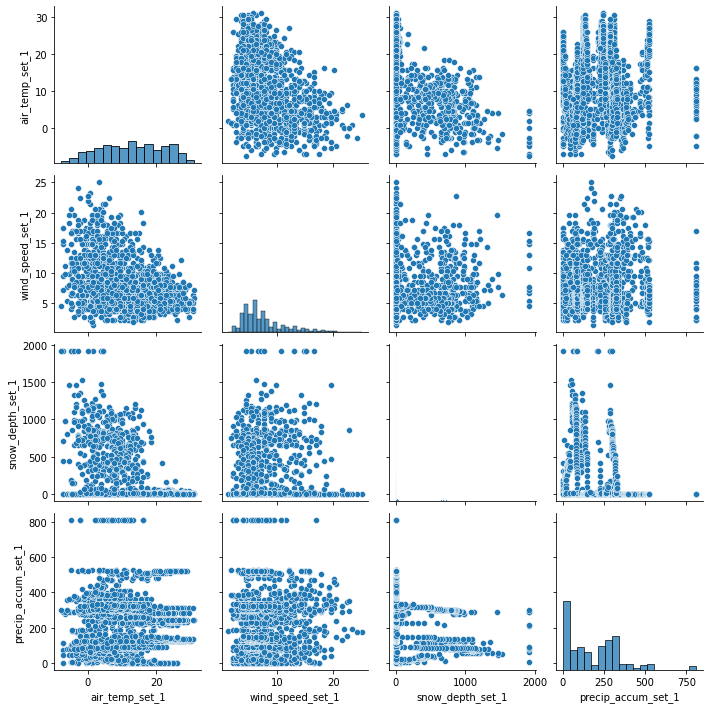

In [10]:
davg['snow_depth_set_1'] = davg['snow_depth_set_1'].fillna(0)
davg['precip_accum_set_1'] = davg['precip_accum_set_1'].fillna(0)
sns.pairplot(davg)

<AxesSubplot:xlabel='Date_Time'>

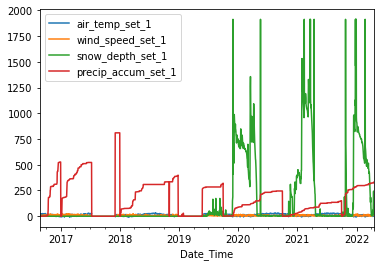

In [11]:
davg.plot.line()

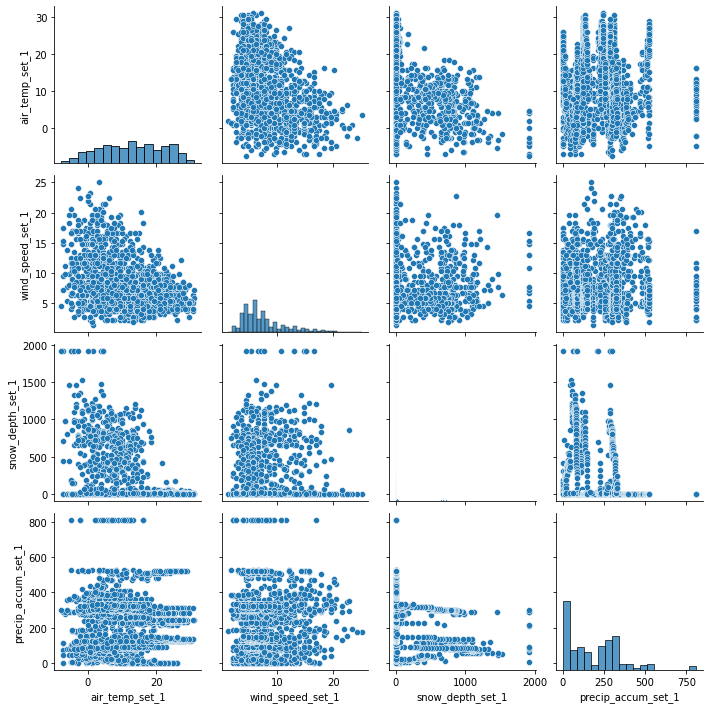

In [12]:
sns.pairplot(davg)

In [13]:
df['precip_diff_set_1'] = df['precip_accum_set_1'].diff()
df['precip_diff_set_1'] = df['precip_diff_set_1'].clip(lower=0)

<AxesSubplot:xlabel='Date_Time'>

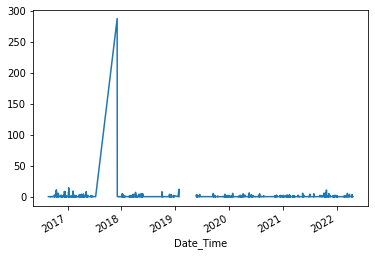

In [14]:
df['precip_diff_set_1'].plot.line()

In [17]:
df['precip_diff_set_1'] = df['precip_diff_set_1'].fillna(0)

<AxesSubplot:xlabel='Date_Time'>

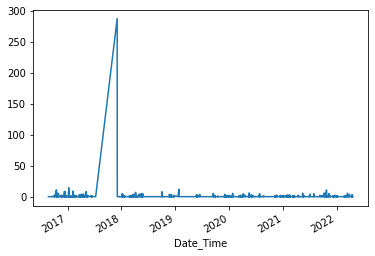